In [1]:
#select where to run this notebook---
binder_or_localpc=True #True: if you want to run the script using binder or in your local PC
google_colab=False #True: if you want to run the script in google colab

In [2]:
%%capture
#!pip freeze. #to list the packages installed in colab
#or install without checking above (!but do it just once)---
if google_colab:
    !pip install numpy
    !pip install matplotlib
    !pip install netcdf4
    !pip install xarray
    !pip install scipy
    !pip install tqdm

In [3]:
#open packages---
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import xarray as xr
import os
import sys

In [4]:
#modify the local path in case you run this script in your computer---
if binder_or_localpc:
    main_dir="../"
if google_colab:
    #google colab path:
    mount_point='/content/gdrive/' #dir name for a temporal mount point (just for running this script)
    gdrive_path="MyDrive/colab_repos/" #the path in "my Google Drive" where you have cloned the repo
    main_dir=mount_point+gdrive_path
    #mount:
    from google.colab import drive
    drive.mount(mount_point)

In [5]:
#don't modify below names---
#AGU number:
agu_number="num" #put here the agu manuscript number
#name of the repository:
if binder_or_localpc: 
    dir_repo_name=""
if google_colab:
    #name of directories from the cloned github repo:
    dir_repo_name="paper_Atmospherically_Driven_Seasonal_Interannual_LTTS_MultipleInlet/"
dir_data="data/"
dir_figures="figures/"
#name of files with data:
file_wind_based_model_Tr=f"wind_based_model_Tr.nc"
file_wind_based_model_Te=f"wind_based_model_Te.nc"

In [6]:
#create dir figures if it does not exists---
if not os.path.exists(main_dir+dir_repo_name+dir_figures):
    os.makedirs(main_dir+dir_repo_name+dir_figures)

In [7]:
#set global parameters for figures---
glob_font_size=10
params = {'legend.fontsize':glob_font_size-2.5,
          'axes.titlesize':glob_font_size,'axes.labelsize': glob_font_size, #size of titles, x-y labels 
          'xtick.labelsize':glob_font_size-1,'ytick.labelsize':glob_font_size-1, #size of xtick-labels, ytick-labels
          'xtick.major.size':2,'xtick.major.width':.8, #length and width of xticks marks
          'ytick.major.size':2,'ytick.major.width':.8,} #length and width of yticks marks
mpl.rcParams.update(params)

In [8]:
#open data---
ds_Tr_model=xr.open_dataset(main_dir+dir_repo_name+dir_data+file_wind_based_model_Tr)
ds_Te_model=xr.open_dataset(main_dir+dir_repo_name+dir_data+file_wind_based_model_Te)

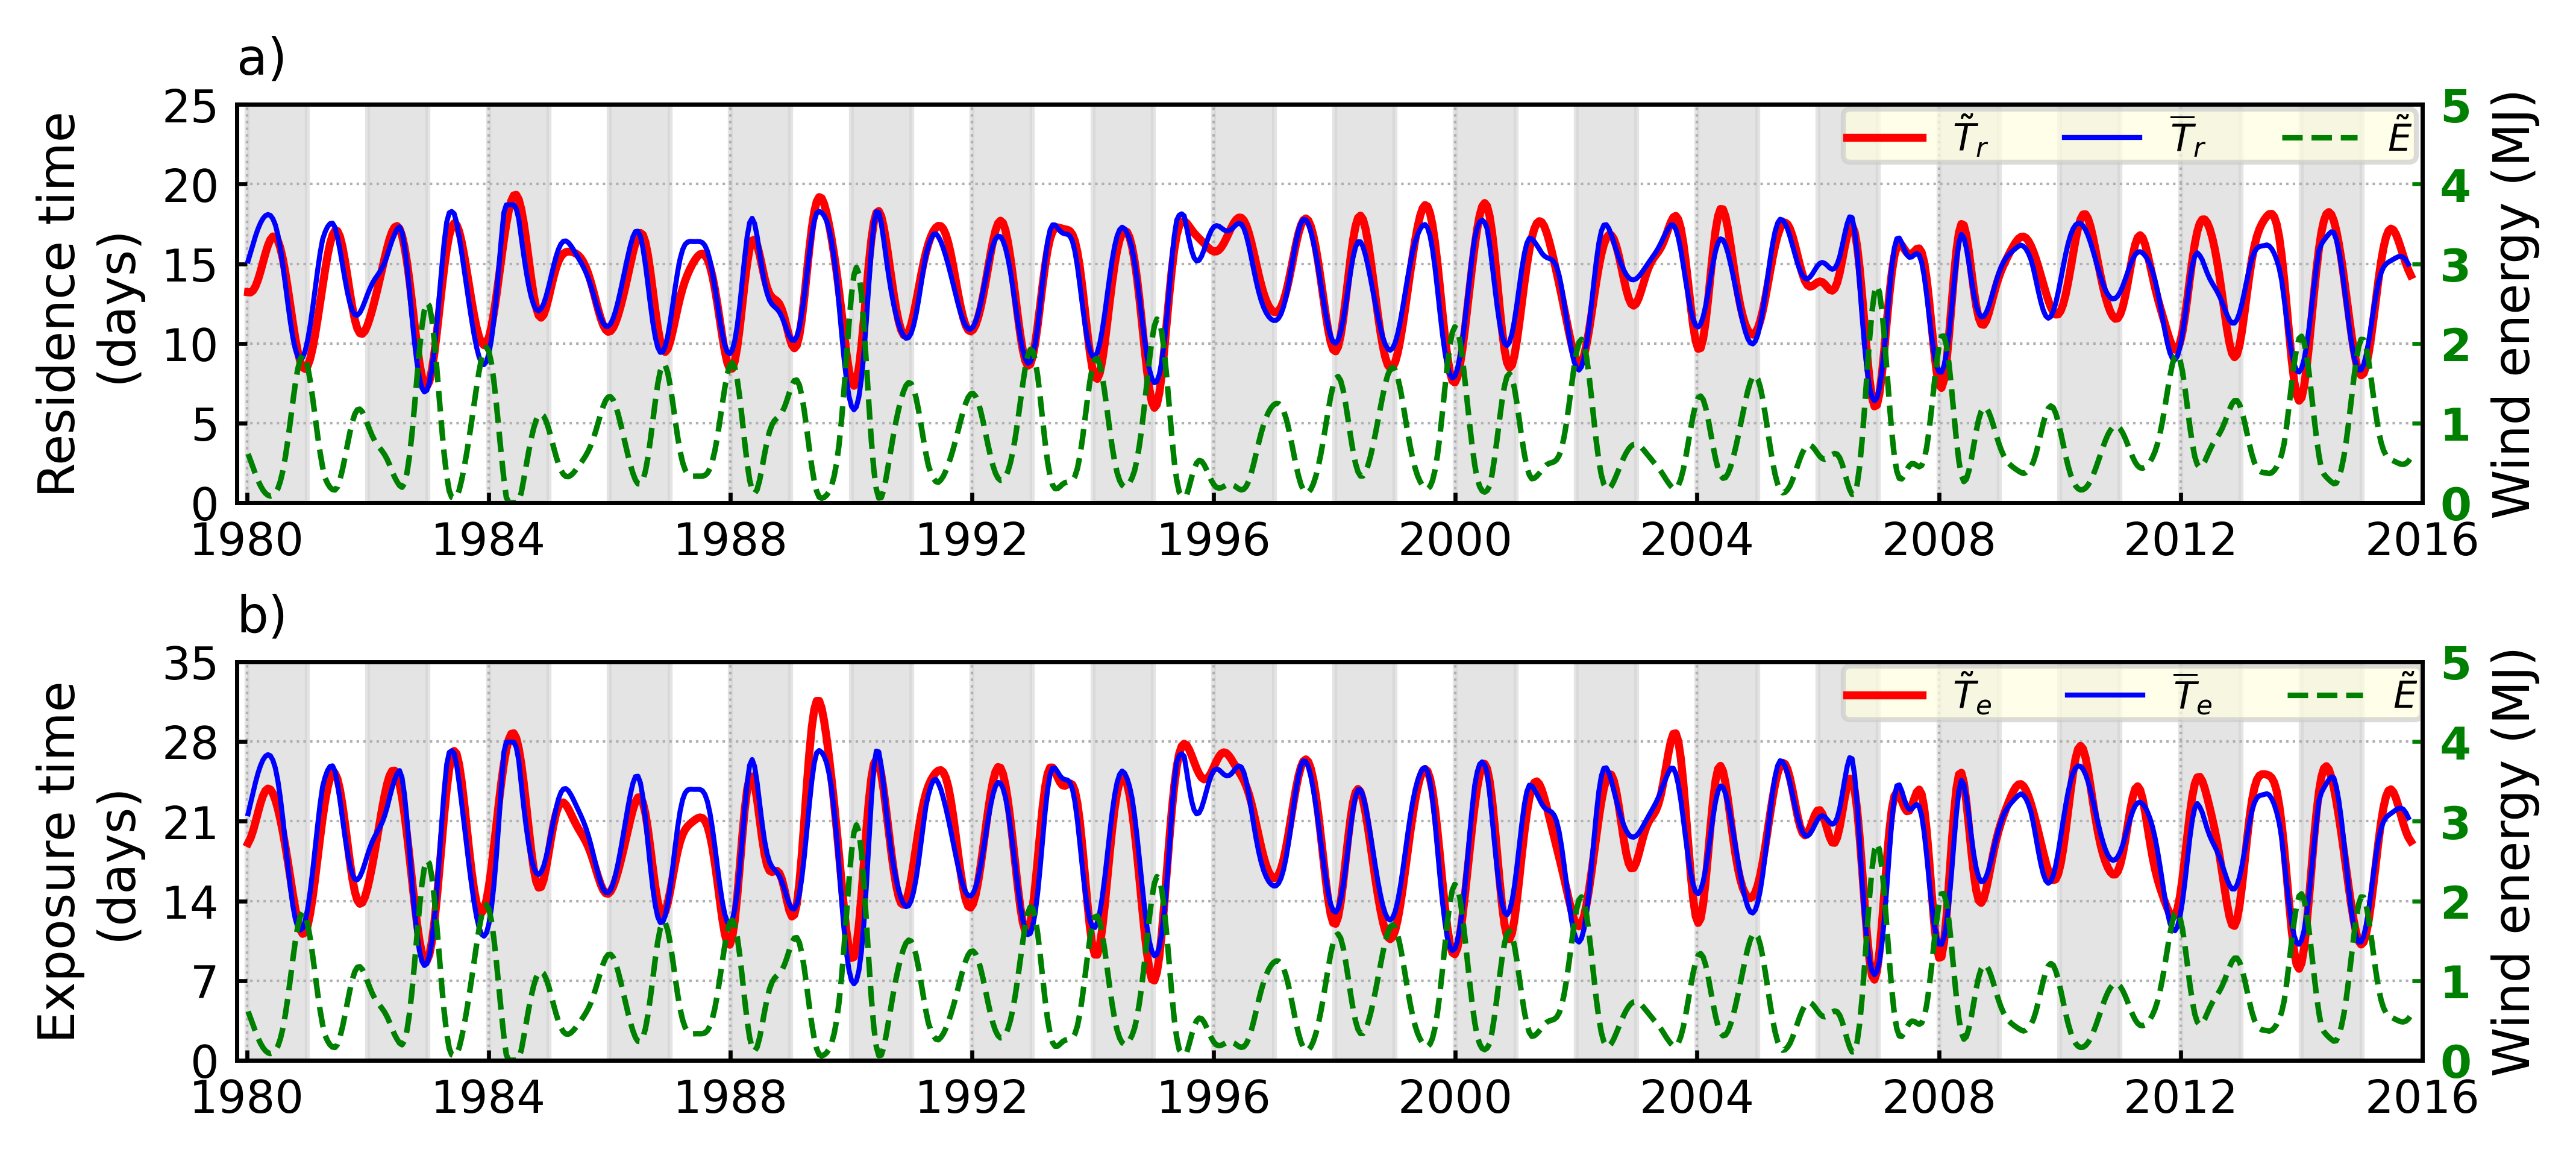

In [9]:
#time series with wind model prediction and wind energy
#
fig,ax=plt.subplots(2,1,figsize=(7.8,3.5),gridspec_kw={'hspace':.4},dpi=600)
#
time=ds_Tr_model.time.values
for i in range(2):
    #
    #xticks for time 
    xticks_lab=np.arange(int(str(time[0])[:4]),int(str(time[-1])[:4])+4,4)
    xticks=[np.datetime64(str(j)+'-01-01') for j in xticks_lab]
    tt1=np.arange(np.datetime64("1980"),np.datetime64("2018"),2)
    tt2=np.arange(np.datetime64("1981"),np.datetime64("2017"),2)
    #plot grey rectangles every 2 years in the background
    for j in range(len(tt1)-1): ax[i].axvspan(tt1[j],tt2[j],alpha=.6,color='lightgrey') 
    #
    if i==0:
        title="a)"
        data_ylabel=f'Residence time'
        data_filter_label=r"$\tilde{T}_r$" 
        wind_based_model=r"$\overline{T}_r$"
        data_filter=ds_Tr_model.Tr_tilde
        data_wind_model=ds_Tr_model.Tr_tilde_windmodel_lag
        data_levs=np.arange(0,26,5)
    else:
        title="b)"
        data_ylabel=r'Exposure time'
        data_filter_label=r"$\tilde{T}_e$"
        wind_based_model=r"$\overline{T}_e$"
        data_filter=ds_Te_model.Te_tilde
        data_wind_model=ds_Te_model.Te_tilde_windmodel_lag
        data_levs=np.arange(0,36,7)
    #
    l0,=ax[i].plot(time,data_filter,c='r',label=data_filter_label,lw=1.6)
    l1,=ax[i].plot(time,data_wind_model,'b',lw=1,label=wind_based_model)
    ax[i].set_ylim([data_levs[0],data_levs[1]]); ax[i].set_yticks(data_levs)    
    ax[i].set_ylabel(f"{data_ylabel}\n(days)") 
    ax[i].set_xlim([np.datetime64('1979-11-01'),xticks[-1]])
    ax[i].set_xticks(xticks); ax[i].set_xticklabels(xticks_lab,rotation=0);
    ax[i].tick_params(direction="in")
    ax[i].set_title(title,loc='left')
    ax[i].grid(ls=":",lw=.5);
    #
    #plot filtered dominant wind energy
    ax0=ax[i].twinx()
    l2,=ax0.plot(time,ds_Tr_model.E_tilde,'--',c='green',label=r"$\tilde{E}$",lw=1.1)
    ax0.set_yticks(np.arange(0,6,1));ax0.set_ylim(0,5)
    ax0.set_yticklabels(np.arange(0,6,1),fontweight='bold')
    ax0.set_ylabel("Wind energy (MJ)");
    ax0.tick_params(axis='y',colors='g',direction="in")
    #
    legend=[l0,l1,l2]
    ax[i].legend(handles=legend,loc=(0.735,.855),ncol=4,framealpha=.7,facecolor='lightyellow', borderpad=0.1);
#
fig_name='f06'
fig.savefig(f'{main_dir}{dir_repo_name}{dir_figures}{agu_number}-{fig_name}.jpg',bbox_inches='tight',pad_inches=0.1,dpi=600)
#fig.savefig(f'{main_dir}{dir_repo_name}{dir_figures}{agu_number}-{fig_name}.pdf',bbox_inches='tight',pad_inches=0.1,dpi=600)